# SCALER NETFLIX CASE STUDY : [PROJECT LINK](https://www.scaler.com/academy/mentee-dashboard/class/28625/project/problems/17748?navref=cl_tt_lst_sl)
> ## AUTHOR : MLV PRASAD | DSML MARCH 2022

### EVALUATION CRITERIA AND POINTS :

<hr>
<hr>



**1. Defining Problem Statement and Analysing basic metrics** <code>*10 Points*</code>


**2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to** *'category'* 
**(If required), missing value detection, statistical summary** <code>*10 Points*<code>

**3. Non-Graphical Analysis: Value counts and unique attributes** <code>*10 Points*<code>

**4. Visual Analysis - Univariate, Bivariate after pre-processing of the data**

*(Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country)*


* **4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis** <code>*10 Points*<code>

* **4.2 For categorical variable(s): Boxplot** <code>*10 Points*<code>

* **4.3 For correlation: Heatmaps, Pairplots** <code>*10 Points*<code>

**5. Missing Value & Outlier check (Treatment optional)** <code>*10 Points*<code>

**6.0 Insights based on Non-Graphical and Visual Analysis** <code>*10 Points*<code>

* **6.1 Comments on the range of attributes**

* **6.2 Comments on the distribution of the variables and relationship between them**

* **6.3 Comments for each univariate and bivariate plot**

**7. Business Insights** <code>*10 Points*</code> **Should include patterns observed in the data along with what you can infer from it**

**8 Recommendations** <code>*10 Points*</code> - **Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand.**



In [1]:
# importing libraries

import pandas as pd
import numpy as np
import plotly


import matplotlib as mpl
import matplotlib.pyplot as plt
 

import seaborn as sns


plt.rcParams['figure.dpi'] = 200

C:\Users\iampr.MS\anaconda3\envs\google\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('netflix.csv')
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

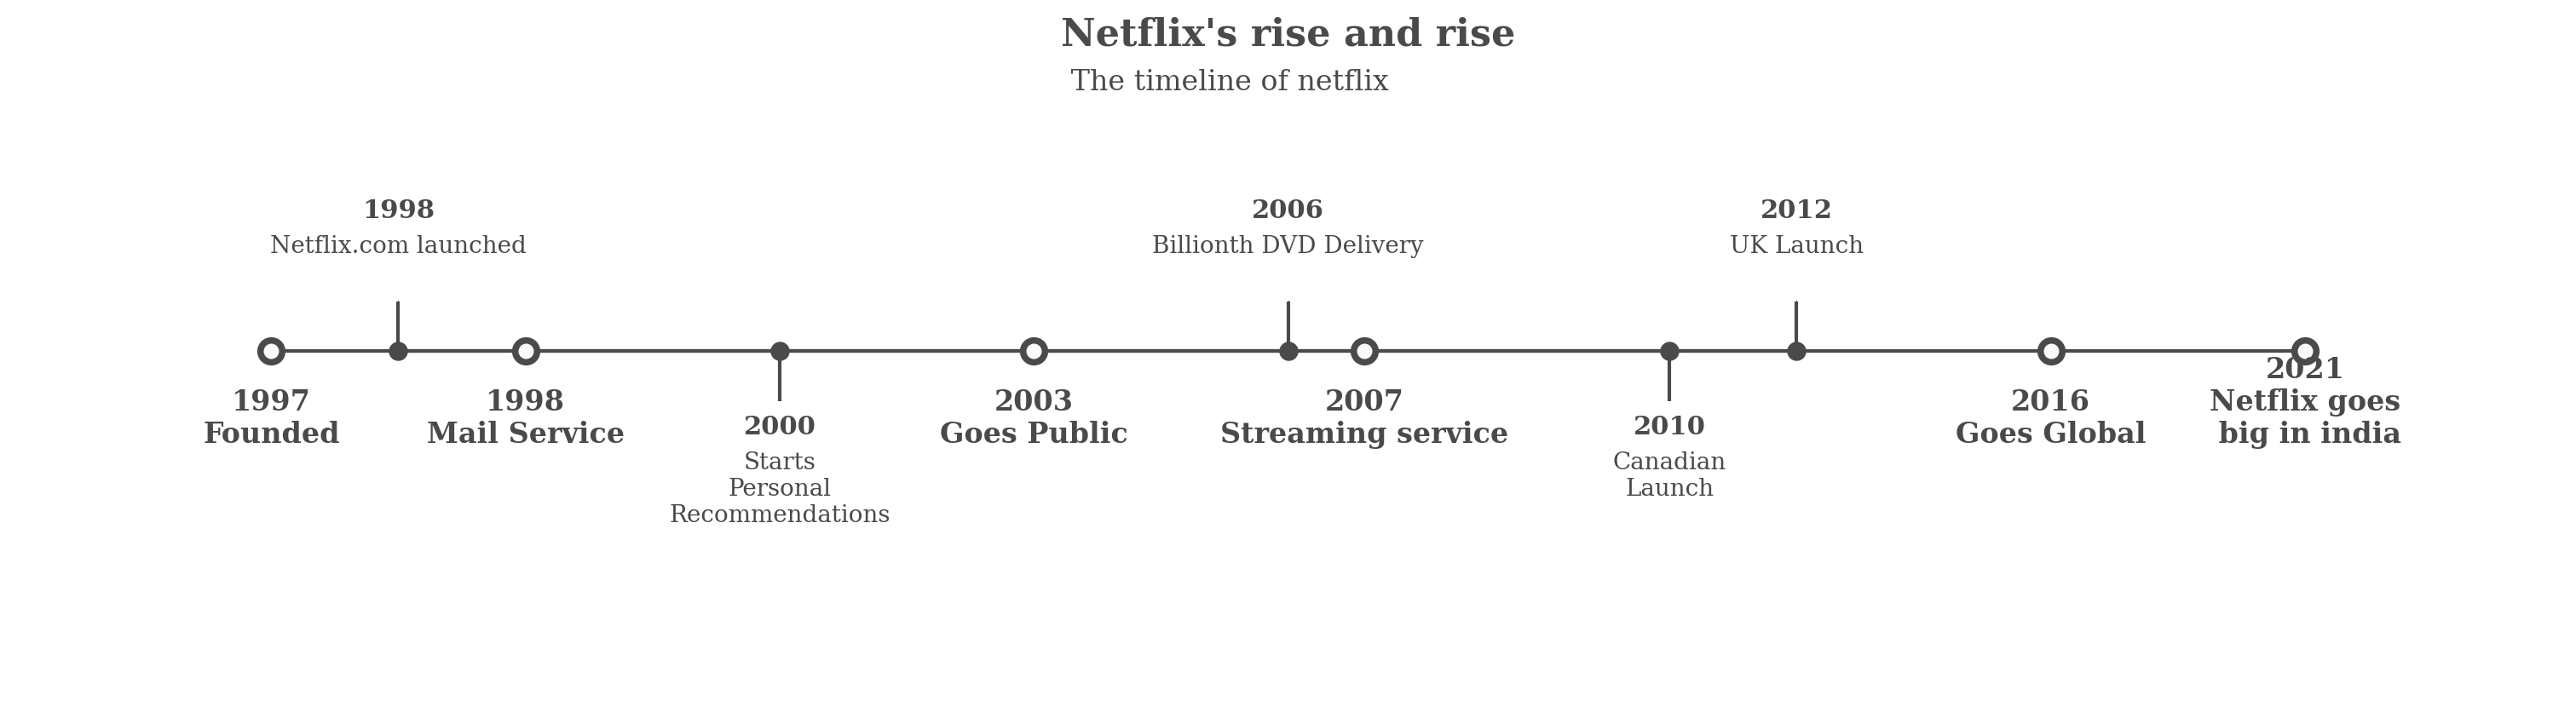

In [3]:
# @credit : taken information from internet 
from datetime import datetime

## these go on the numbers below
tl_dates = [
    "1997\nFounded",
    "1998\nMail Service",
    "2003\nGoes Public",
    "2007\nStreaming service",
    "2016\nGoes Global",
    "2021\nNetflix goes\n big in india"
]

tl_x = [1, 2, 4, 5.3, 8,9]

## these go on the numbers
tl_sub_x = [1.5,3,5,6.5,7]


tl_sub_times = [
    "1998","2000","2006","2010","2012"
]

tl_text = [
    "Netflix.com launched",
    "Starts\nPersonal\nRecommendations","Billionth DVD Delivery","Canadian\nLaunch","UK Launch\n"]



# Set figure & Axes
fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
ax.set_ylim(-2, 1.75)
ax.set_xlim(0, 10)


# Timeline : line
ax.axhline(0, xmin=0.1, xmax=0.9, c='#4a4a4a', zorder=1)


# Timeline : Date Points
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
# Timeline : Time Points
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a',zorder=4)

# Date Text
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.55, date, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a',fontsize=12)
    

# Stemplot : vertical line
levels = np.zeros(len(tl_sub_x))    
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)    
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

# Text
for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a' if idx!=len(tl_sub_x) else '#4a4a4a', fontsize=11)
    
    ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center', 
        fontfamily='serif',color='#4a4a4a' if idx!=len(tl_sub_x) else '#4a4a4a')



# Spine
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Ticks    
ax.set_xticks([]) 
ax.set_yticks([]) 

# Title
ax.set_title("Netflix's rise and rise", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')
ax.text(2.4,1.57,"                                                 The timeline of netflix", fontfamily='serif', fontsize=12, color='#4a4a4a')

plt.show()

In [401]:
df=df.drop_duplicates(['title','country','type','release_year'])

# **1. Defining Problem Statement and Analysing basic metrics** <code>*10 Points*</code>

In [402]:
### NETFLIX IS A MULTI-NATIONAL STREAMING COMPANY WHICH PRODUCES
# MOVIES AND TV WEB SERIES ALL AROUND THE YEAR AND ALL AROUND THE GLOBE 
# ANALYSING THE NETFLIX DATASET AND COMAPARING INDIA WITH DIFFERENT COUNTRIES AND
# TAKE CONCLUSION THROUGH VISUAL AND DESCRIPTIVE ANALYSIS

In [461]:
# shape of the data 
df.shape

(8807, 12)

In [ ]:
# the data frame has 8807 rows and 12 columns

In [404]:
#column names
df.columns # this are the columns of the netflux dataframe

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [405]:
# data type of all the attributes
types = []
for i in df.columns :
    types.append([i,type(i)])
for i in types :
    print("data type of",i[0], "is",i[1])

data type of show_id is <class 'str'>
data type of type is <class 'str'>
data type of title is <class 'str'>
data type of director is <class 'str'>
data type of cast is <class 'str'>
data type of country is <class 'str'>
data type of date_added is <class 'str'>
data type of release_year is <class 'str'>
data type of rating is <class 'str'>
data type of duration is <class 'str'>
data type of listed_in is <class 'str'>
data type of description is <class 'str'>


In [462]:
# the list of all the needed classes of the attribute

In [463]:
#INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7983 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 1.1+ MB


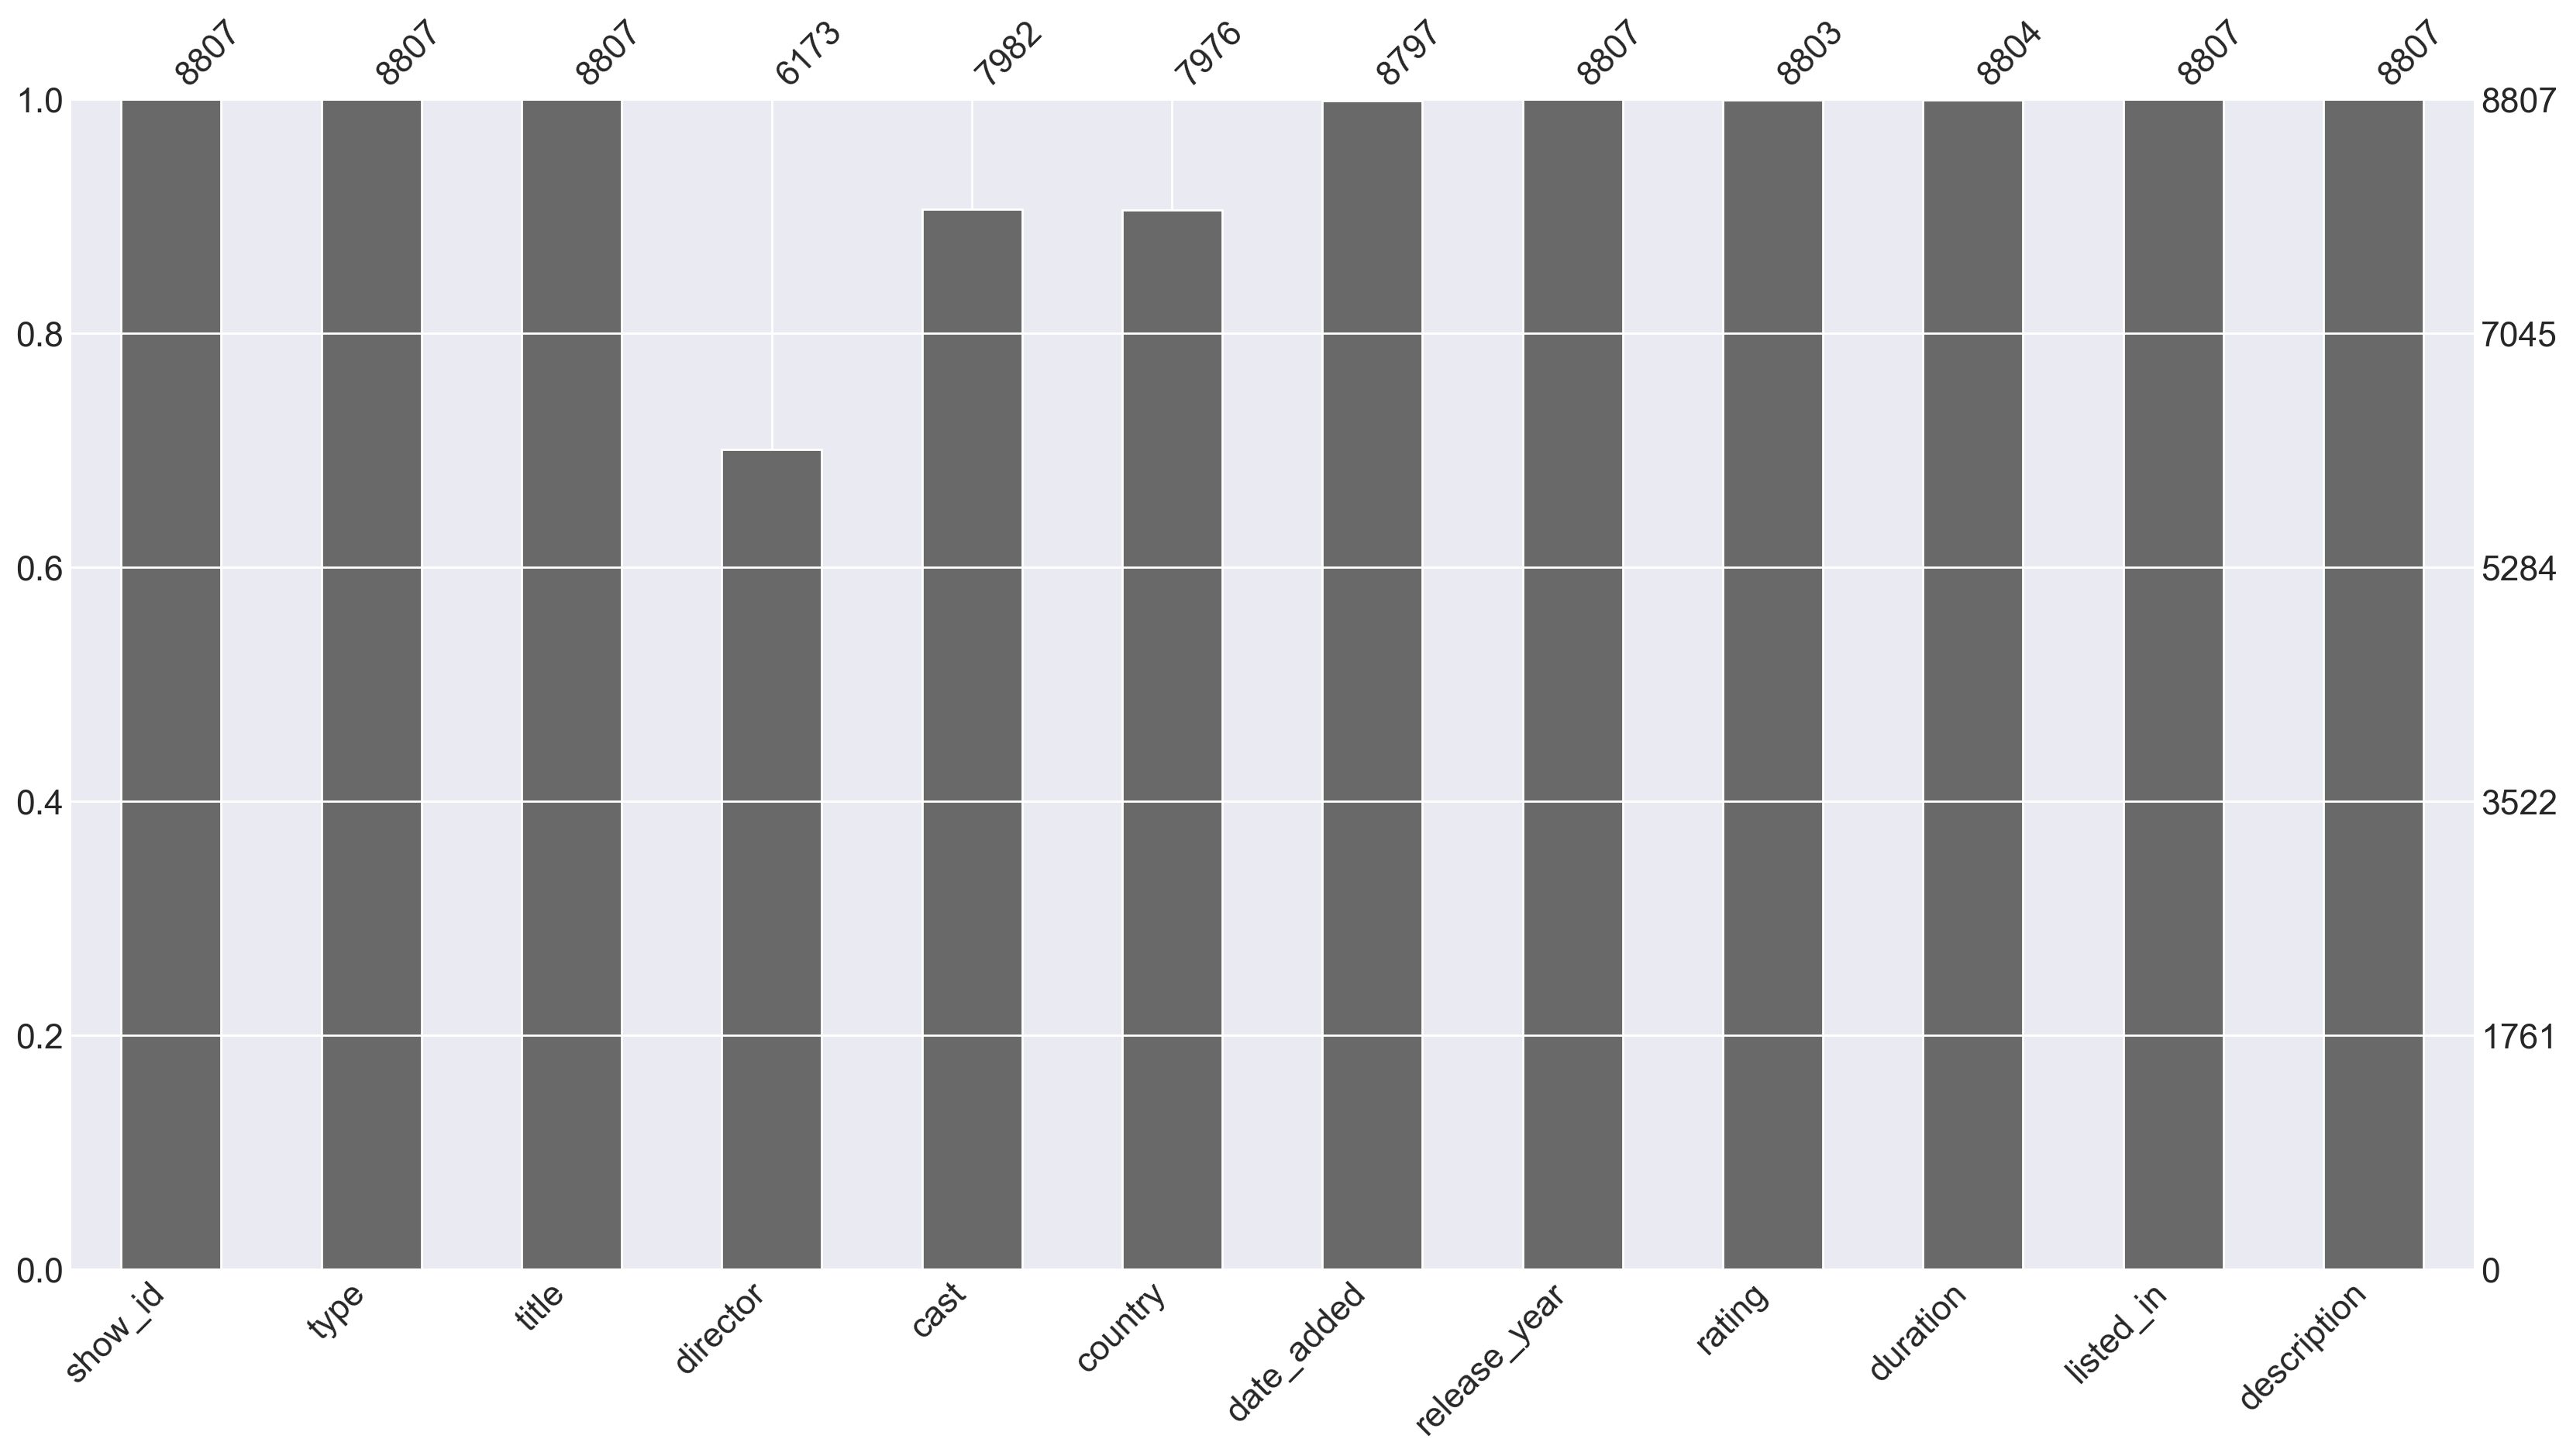

In [407]:
#MISSING VALUES 
msno.bar(df, figsize=(20,10))
plt.show()

In [ ]:
# shows the missing values in the columns

In [408]:
df.describe(include=[np.object]) #summary stats# give the statsistical summary of the object columns

show_id   type    title       director                cast  \
count     8807   8807     8807           6173                7982   
unique    8807      2     8807           4528                7692   
top      s7442  Movie  In Line  Rajiv Chilaka  David Attenborough   
freq         1   6131        1             19                  19   

              country       date_added rating  duration  \
count            7976             8797   8803      8804   
unique            748             1767     17       220   
top     United States  January 1, 2020  TV-MA  1 Season   
freq             2818              109   3207      1793   

                           listed_in  \
count                           8807   
unique                           514   
top     Dramas, International Movies   
freq                             362   

                                              description  
count                                                8807  
unique                                               8775  
top     Paranormal activity at a lush, abandoned prope...  
freq                                                    4

In [409]:
df.describe(include=[np.number]# give the statsistical summary of the numerical columns
#summary stats

release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 894.5+ KB


In [411]:
df.head() # shows the head of the table

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [414]:
df['date_added'] = pd.to_datetime(df['date_added'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 894.5+ KB


In [168]:
print(df.type.unique(),df.type.nunique())


['Movie' 'TV Show'] 2


In [207]:
for i in df.columns:
    print("The Unique values and nuniques of ",str(i),"are",df[i].unique(),df[i].nunique())
    print("..................") # value counts and unique values of the columns
    

The Unique values and nuniques of  show_id are ['s1' 's2' 's3' ... 's8805' 's8806' 's8807'] 8807
..................
The Unique values and nuniques of  type are ['Movie' 'TV Show'] 2
..................
The Unique values and nuniques of  title are ['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan'] 8807
..................
The Unique values and nuniques of  director are ['Kirsten Johnson' nan 'Julien Leclercq' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh'] 4528
..................
The Unique values and nuniques of  cast are [nan
 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng'
 'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van

In [191]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# value counts

In [193]:
df['type'].value_counts().reset_index() # value  count of type

index  type
0    Movie  6131
1  TV Show  2676

In [171]:
df['show_id'].value_counts().reset_index() # value  count of show id 

index  show_id
0     s7442        1
1     s8398        1
2     s1804        1
3     s7163        1
4     s4606        1
...     ...      ...
8802  s3810        1
8803  s7704        1
8804  s2988        1
8805  s2708        1
8806  s1879        1

[8807 rows x 2 columns]

In [194]:
df['title'].value_counts().reset_index() # value count of the title

index  title
0                                               In Line      1
1     Michael Bolton's Big, Sexy Valentine's Day Spe...      1
2                                              Daybreak      1
3                                             Wrong No.      1
4                                              Unriddle      1
...                                                 ...    ...
8802                                Running Out Of Time      1
8803                               The Light of My Eyes      1
8804        Jani Dueñas: Grandes fracasos de ayer y hoy      1
8805                                        Ghost Rider      1
8806                                  Kill the Irishman      1

[8807 rows x 2 columns]

In [195]:
df['director'].value_counts().reset_index() #value count of the director 

index  director
0                                         Rajiv Chilaka        19
1                                Raúl Campos, Jan Suter        18
2                                           Suhas Kadav        16
3                                          Marcus Raboy        16
4                                             Jay Karas        14
...                                                 ...       ...
4523  Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket C...         1
4524                                      Jason Bourque         1
4525                                         Kader Aoun         1
4526                  Hanung Bramantyo, Pandu Adjisurya         1
4527                                    Nathaniel Warsh         1

[4528 rows x 2 columns]

In [197]:
df['country'].value_counts().reset_index() #@value count of the country

index  country
0                          United States     2818
1                                  India      972
2                         United Kingdom      419
3                                  Japan      245
4                            South Korea      199
..                                   ...      ...
743                        India, Turkey        1
744            United Kingdom, Hong Kong        1
745             France, Senegal, Belgium        1
746                              Finland        1
747  Netherlands, Germany, Italy, Canada        1

[748 rows x 2 columns]

In [198]:
df['date_added'].value_counts().reset_index()#value counts of the dat added column

index  date_added
0        January 1, 2020         109
1       November 1, 2019          89
2          March 1, 2018          75
3      December 31, 2019          74
4        October 1, 2018          71
...                  ...         ...
1762    October 31, 2015           1
1763   November 29, 2020           1
1764  September 30, 2016           1
1765    February 3, 2019           1
1766    February 8, 2016           1

[1767 rows x 2 columns]

In [199]:
df['release_year'].value_counts().reset_index() # value count of the release year column

index  release_year
0    2018          1147
1    2017          1032
2    2019          1030
3    2020           953
4    2016           902
..    ...           ...
69   1966             1
70   1925             1
71   1947             1
72   1959             1
73   1961             1

[74 rows x 2 columns]

In [201]:
df['rating'].value_counts().reset_index() 
# value count of the rating column

index  rating
0      TV-MA    3207
1      TV-14    2160
2      TV-PG     863
3          R     799
4      PG-13     490
5      TV-Y7     334
6       TV-Y     307
7         PG     287
8       TV-G     220
9         NR      80
10         G      41
11  TV-Y7-FV       6
12        UR       3
13     NC-17       3
14    84 min       1
15    74 min       1
16    66 min       1

In [202]:
df['duration'].value_counts().reset_index() # value count of the duration

index  duration
0      1 Season      1793
1     2 Seasons       425
2     3 Seasons       199
3        90 min       152
4        93 min       146
..          ...       ...
215  17 Seasons         1
216      10 min         1
217      43 min         1
218     214 min         1
219     312 min         1

[220 rows x 2 columns]

In [203]:
df['listed_in'].value_counts().reset_index() # value count of the listenin column

index  listed_in
0                         Dramas, International Movies        362
1                                        Documentaries        359
2                                      Stand-Up Comedy        334
3               Comedies, Dramas, International Movies        274
4     Dramas, Independent Movies, International Movies        252
..                                                 ...        ...
509  Classic & Cult TV, Kids' TV, TV Action & Adven...          1
510  Crime TV Shows, International TV Shows, Realit...          1
511      Horror Movies, LGBTQ Movies, Music & Musicals          1
512  Reality TV, Science & Nature TV, TV Action & A...          1
513           Comedies, LGBTQ Movies, Music & Musicals          1

[514 rows x 2 columns]

In [204]:
df['description'].value_counts().reset_index() # value count of the description column

index  description
0     Paranormal activity at a lush, abandoned prope...            4
1     Challenged to compose 100 songs before he can ...            3
2     A surly septuagenarian gets another chance at ...            3
3     Multiple women report their husbands as missin...            3
4     An aspiring musician battles age-old caste div...            2
...                                                 ...          ...
8770  As World War I looms, an American nurse travel...            1
8771  In 1921, nurse trainees from Madrid's upper cl...            1
8772  After each of them loses a child to murder, tw...            1
8773  With rare footage and candid interviews, this ...            1
8774  Twins separated by a court order meet at camp ...            1

[8775 rows x 2 columns]

In [313]:
countries = df['country'].value_counts()[df['country'].value_counts(normalize=True)> 0.005]
list_countries = list(countries.index)

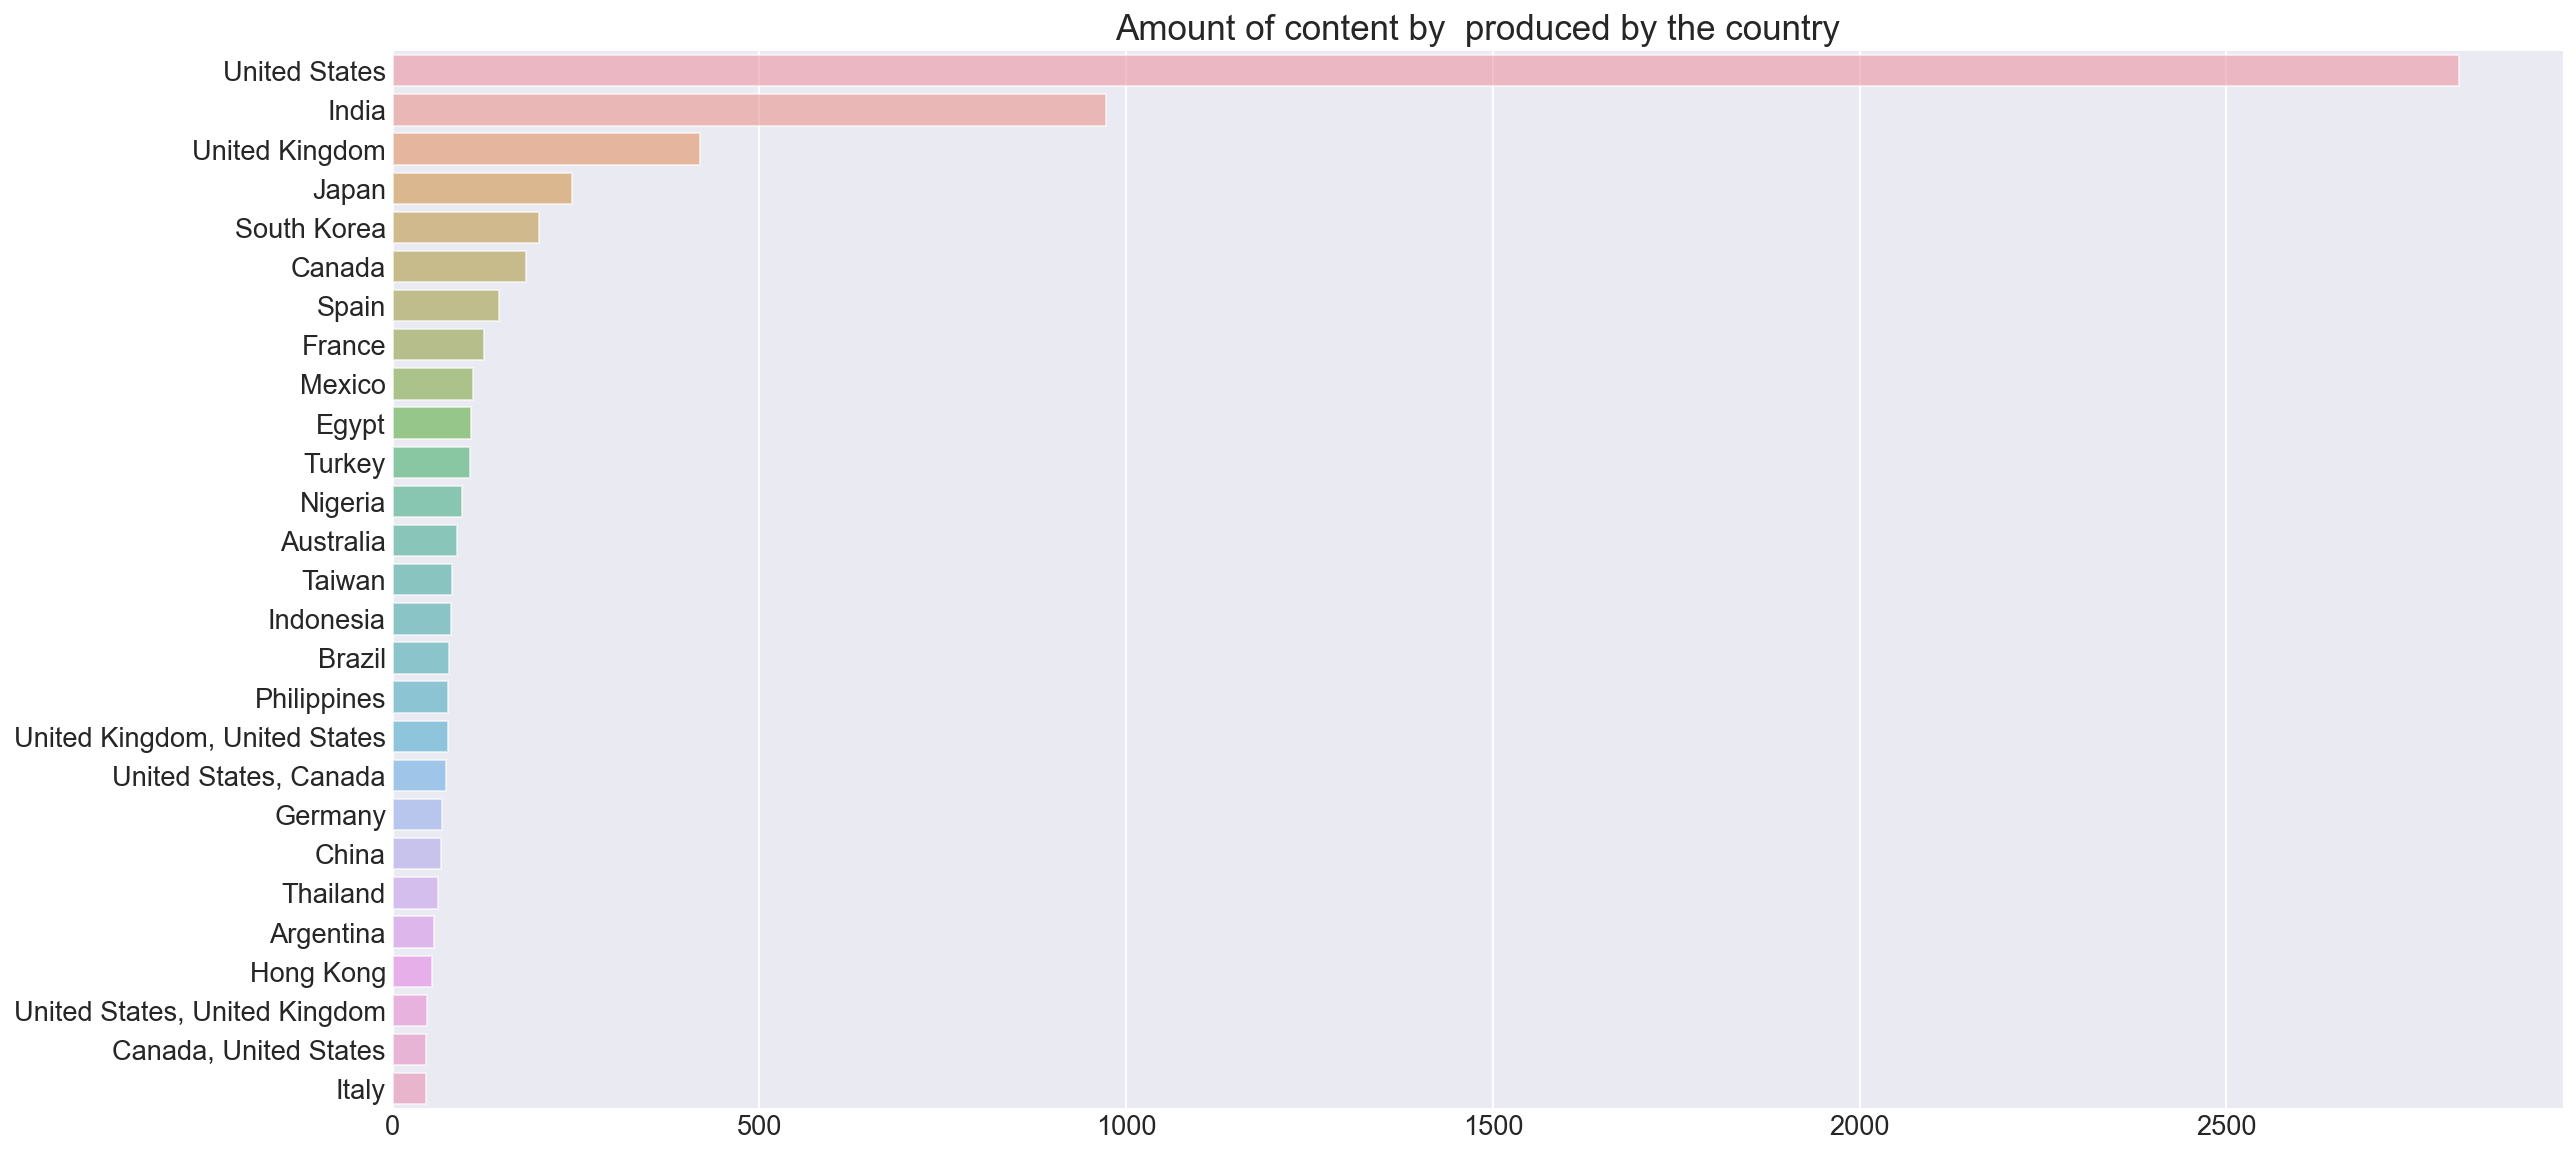

In [320]:
# barplotting the number of content per each country
plt.figure(figsize=(20,10))
plt.title('Amount of content by  produced by the country', fontsize=18)
plt.tick_params(labelsize=14)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.show()

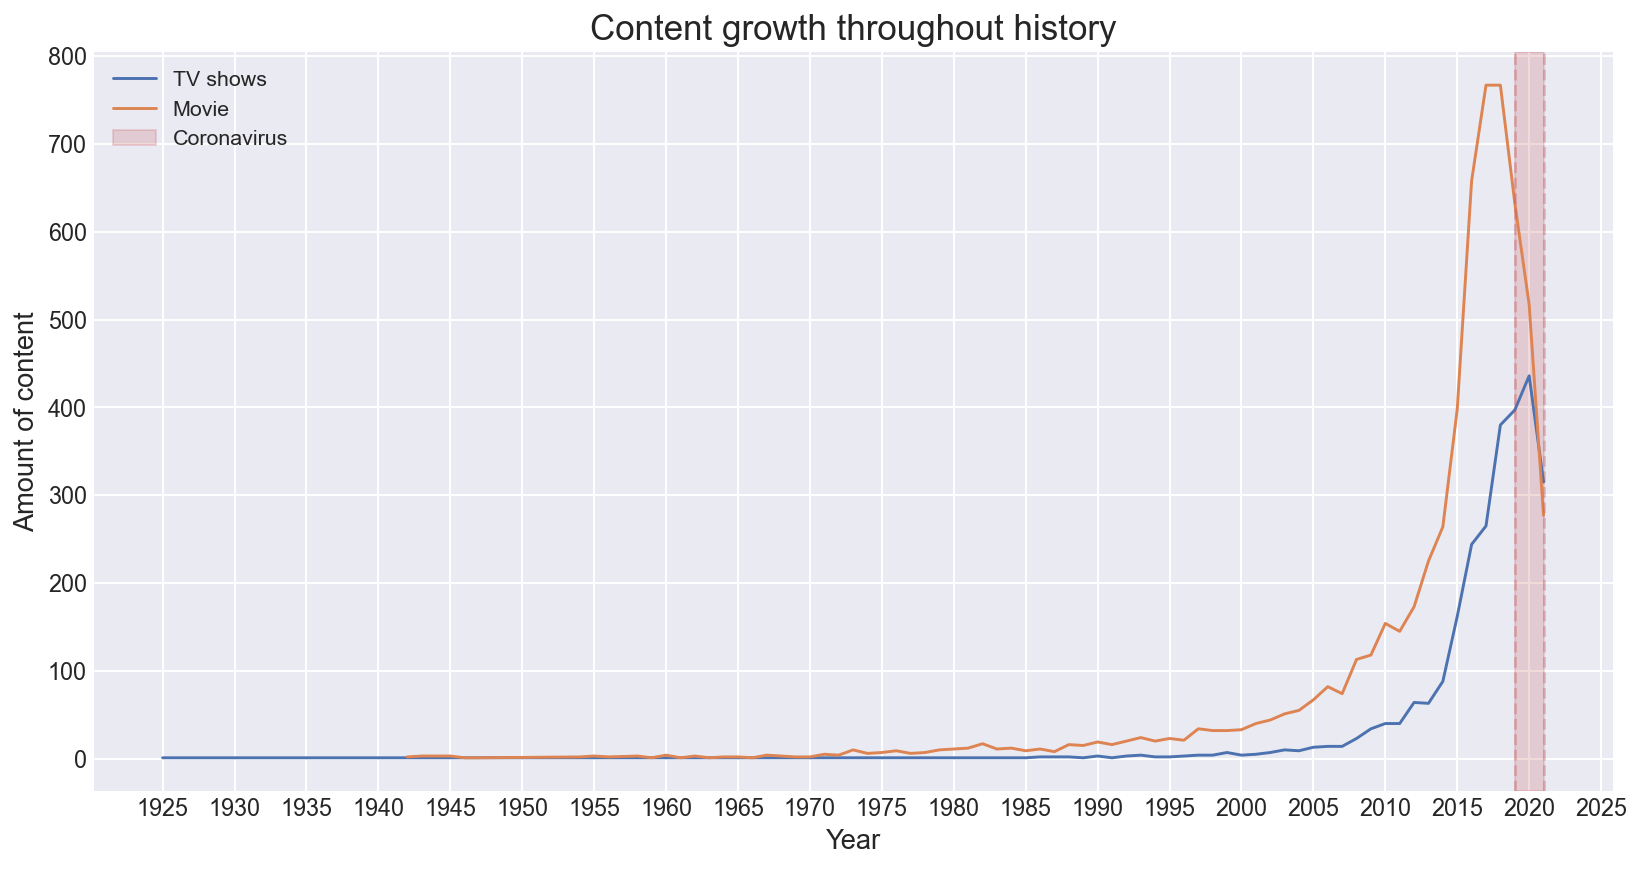

In [324]:
TVshows = df[df['type'] == 'TV Show']
Movie = df[df['type'] == 'Movie']

TVshows_progress = TVshows['release_year'].value_counts().sort_index()
Movie_progress = Movie['release_year'].value_counts().sort_index()

plt.figure(figsize=(14, 7))

plt.plot(TVshows_progress.index, TVshows_progress.values, label='TV shows')
plt.plot(Movie_progress.index, Movie_progress.values, label='Movie')

plt.axvline(2019, alpha=0.3, linestyle='--', color='r')
plt.axvline(2021, alpha=0.3, linestyle='--', color='r')
plt.axvspan(2019, 2021, alpha=0.2, color='r', label='Coronavirus')

plt.xticks(list(range(1925, 2026, 5)), fontsize=12)
plt.title('Content growth throughout history', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount of content', fontsize=14)
plt.yticks(fontsize=12)
plt.legend()
plt.show()
# shows that it has its peak at 2019 and corona virus pandamic has severly affected the content

<AxesSubplot:xlabel='type', ylabel='count'>

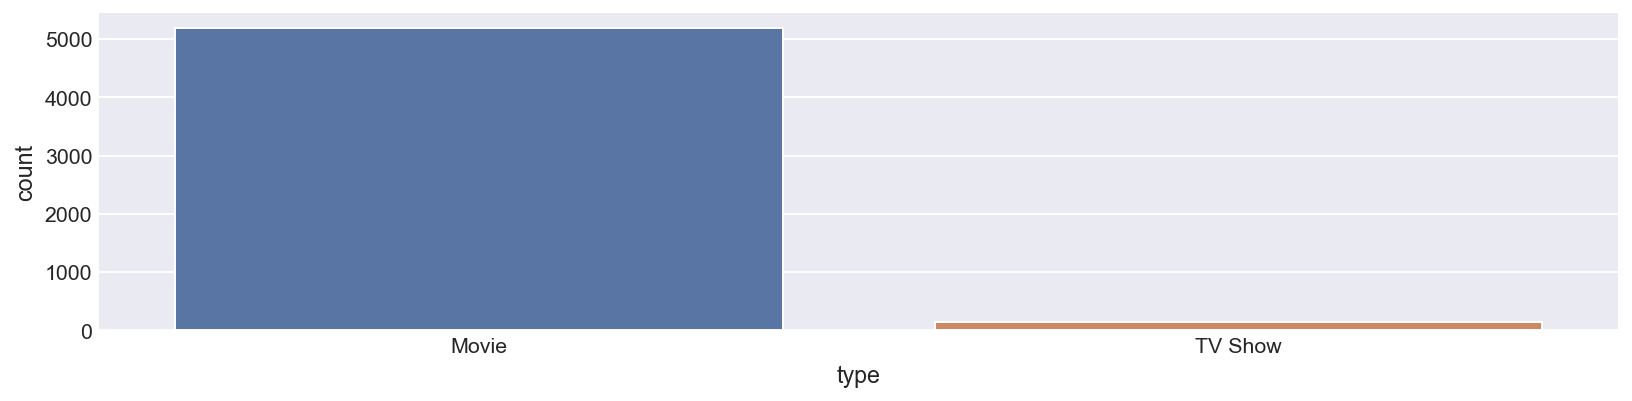

In [337]:
plt.figure(figsize=(14, 3))
sns.countplot(x='type',data = df)

#ratio of the movie / tv shows # there is a clear majority of movies released by netflix

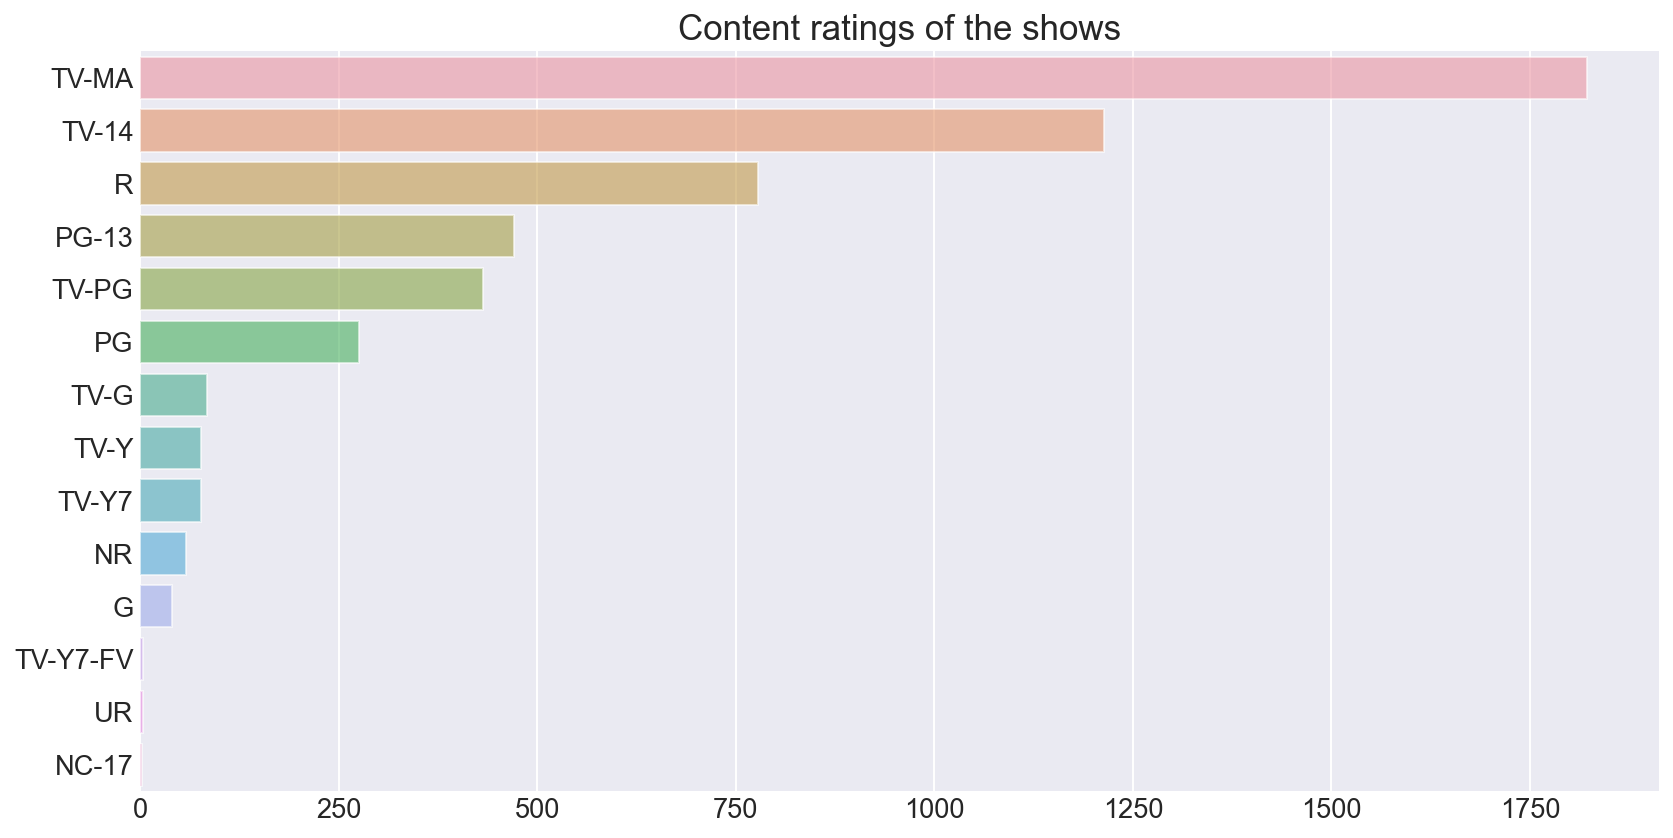

In [327]:
df.dropna(inplace=True)

rating = df['rating'].value_counts()

plt.figure(figsize=(14,7))
plt.title('Content ratings of the shows', fontsize=18)
plt.tick_params(labelsize=14)
sns.barplot(y=rating.index, x=rating.values, alpha=0.6)

plt.show() # most conetent is tv for matured audience and tv for 14 yrs 

<AxesSubplot:xlabel='rating', ylabel='count'>

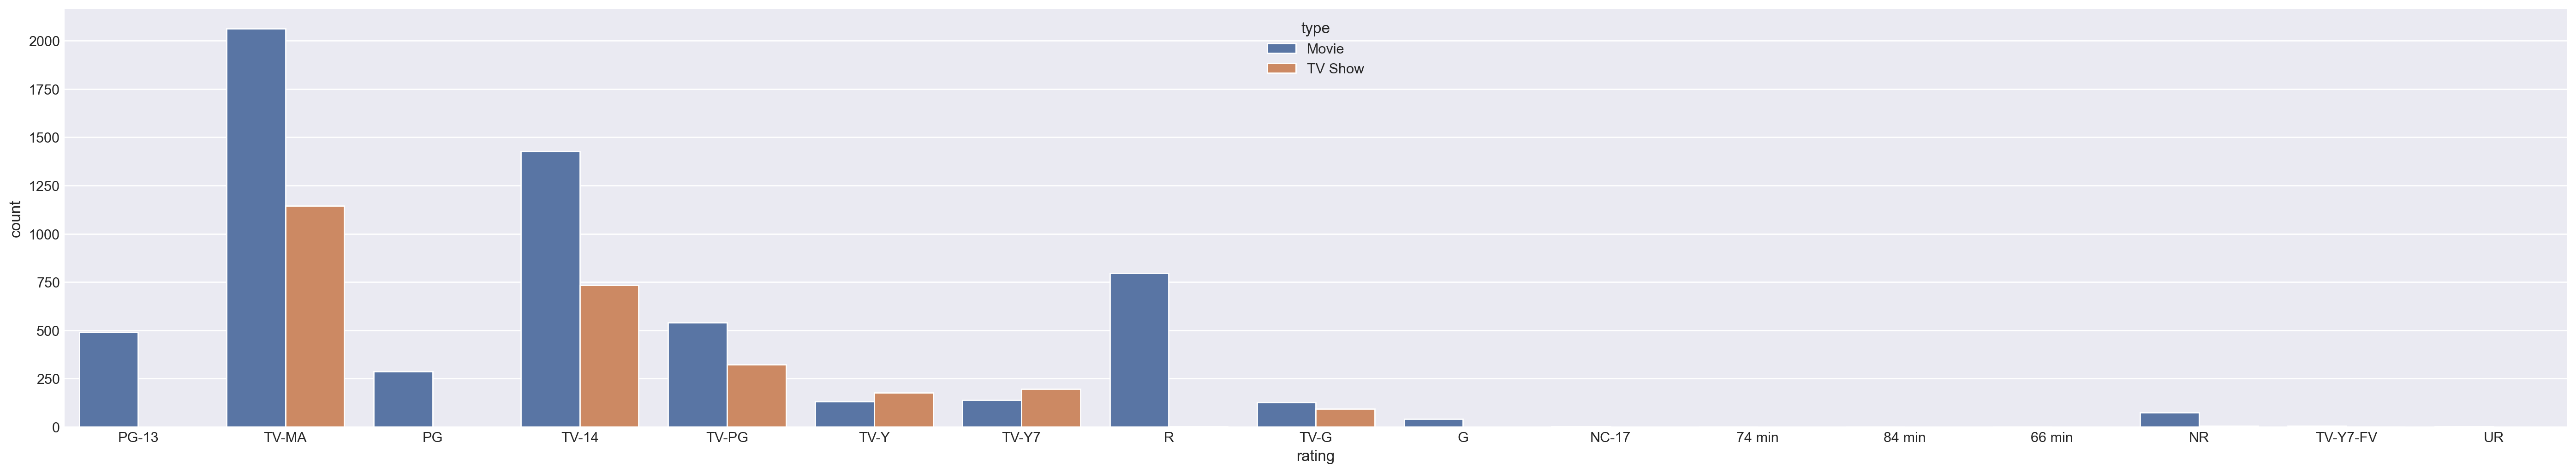

In [439]:
plt.figure(figsize = (35,6))
sns.countplot(x='rating',data = df,hue='type')  # most shows and movuie wit matured audience rating has been produced

In [5]:
temp_df1 = df['release_year'].value_counts().reset_index()


import plotly.graph_objects as go

trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['release_year'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'CONTENT RELEASE OVER THE YEAR' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

# content produced over the year in histoghramic statistic 

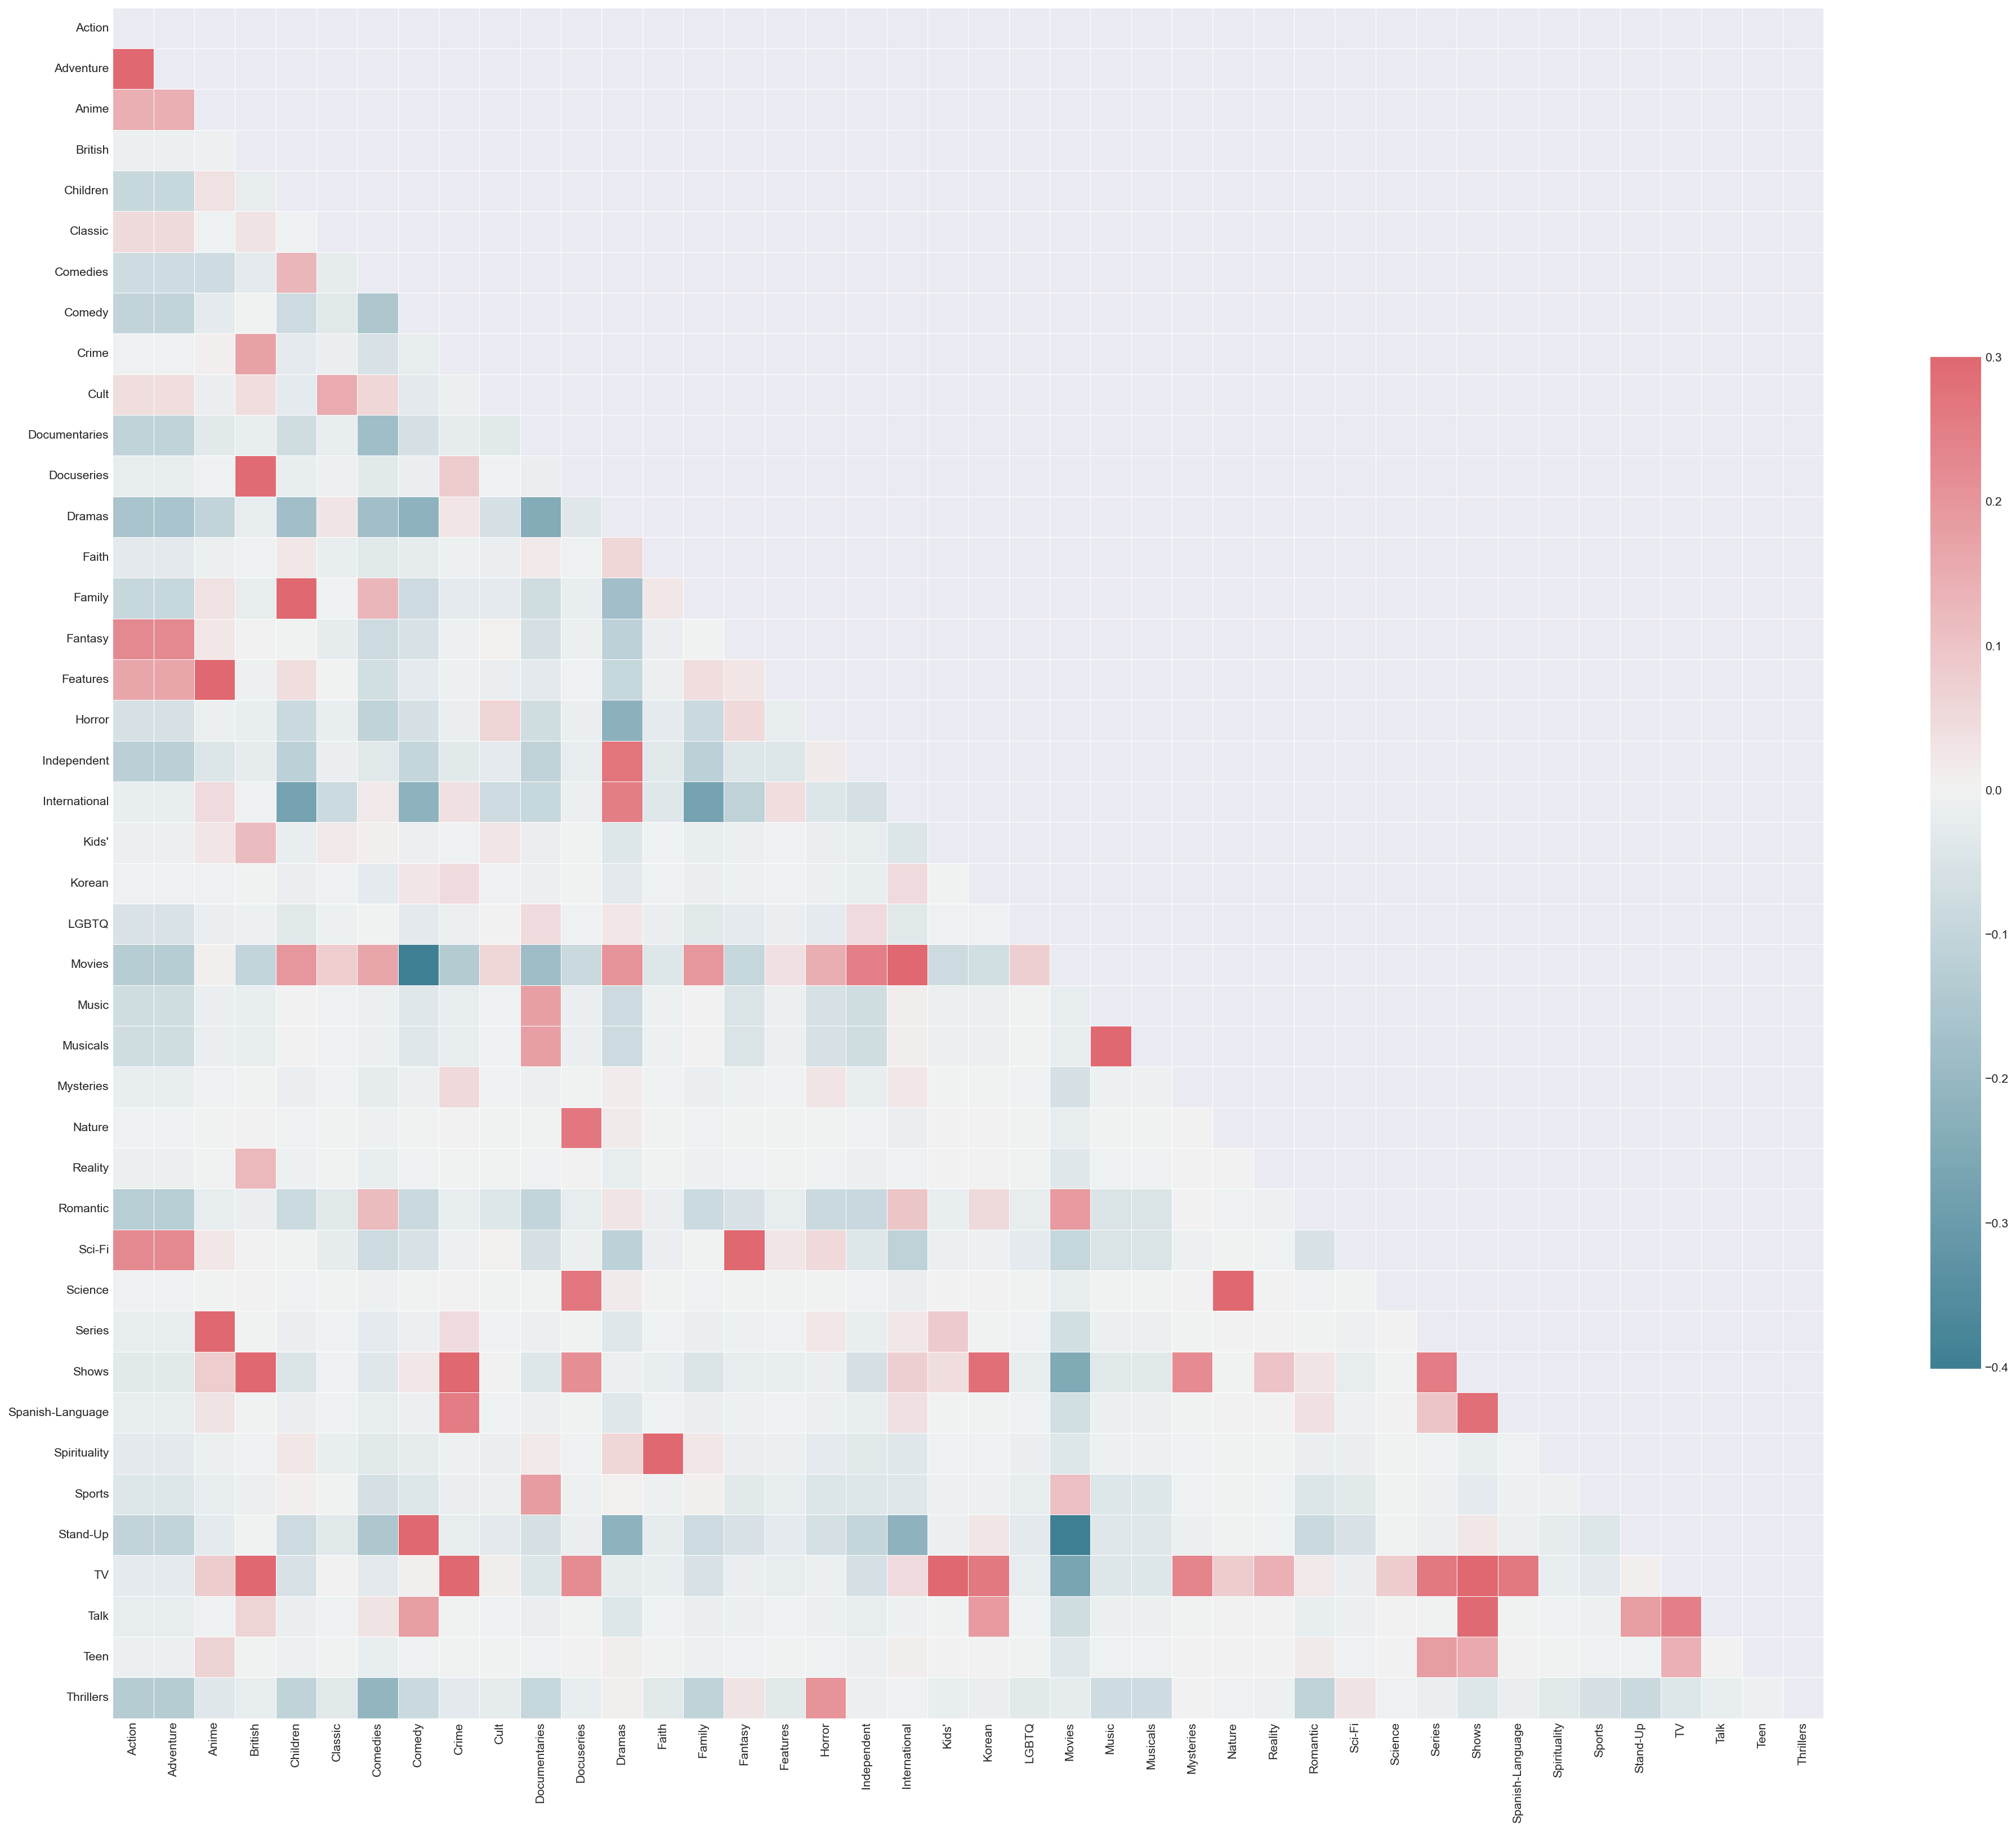

In [342]:
# bold('**HEATMAP(Correlation)**')
from sklearn.preprocessing import MultiLabelBinarizer # Similar to One-Hot Encoding

data= df['listed_in'].astype(str).apply(lambda s : s.replace('&',' ').replace(',', ' ').split()) 

test = data
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_)
corr = res.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(35, 34))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# shows that international movies with target audience children are low

<AxesSubplot:xlabel='type', ylabel='rating'>

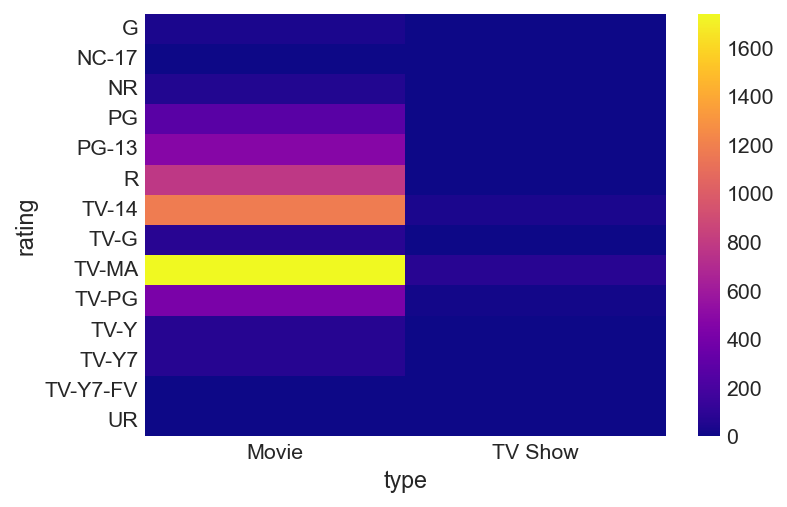

In [347]:
colormap = plt.cm.plasma
sns.heatmap(pd.crosstab(df["rating"], df["type"]), cmap = colormap)

In [430]:
mf = df
mf =mf.drop(['show_id', 'title', 'director', 'cast',   'rating', 'duration', 'description','listed_in'], axis = 1)
mf.head()

type        country date_added  release_year
0    Movie  United States 2021-09-25          2020
1  TV Show   South Africa 2021-09-24          2021
2  TV Show            NaN 2021-09-24          2021
3  TV Show            NaN 2021-09-24          2021
4  TV Show          India 2021-09-24          2021

In [429]:
mf.columns

Index(['type', 'country', 'date_added', 'release_year'], dtype='object')

<Figure size 7000x1200 with 0 Axes>

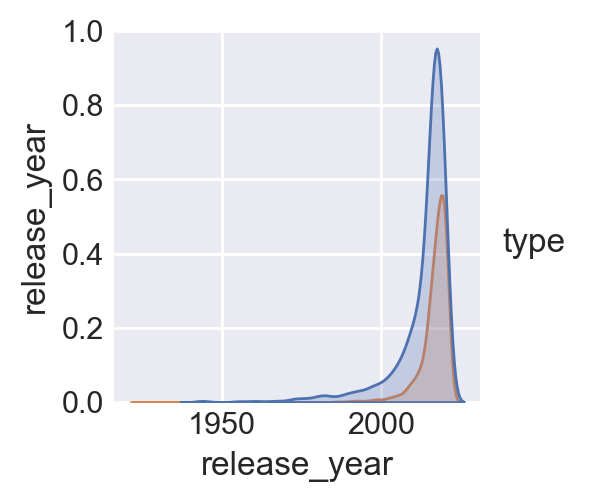

In [443]:
plt.figure(figsize = (35,6))
sns.pairplot(mf,hue='type') # pair plot of type and released year 

In [6]:
# plt.figure(figsize = (35,6))
df = pd.read_csv('netflix.csv')
import plotly.express as px
data = dict(    number=[1063,619,135,60,44,41,40,40,38,35],
    country=["United States", "India", "United Kingdom", "Canada", "Spain",'Turkey','Philippines','France','South Korea','Australia'])
fig = px.funnel(data, x='number', y='country')
fig.show()

In [481]:
# most content produced by usa followed by india

In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 1.1+ MB


Text(0.5, 1.0, 'Distribution of height')

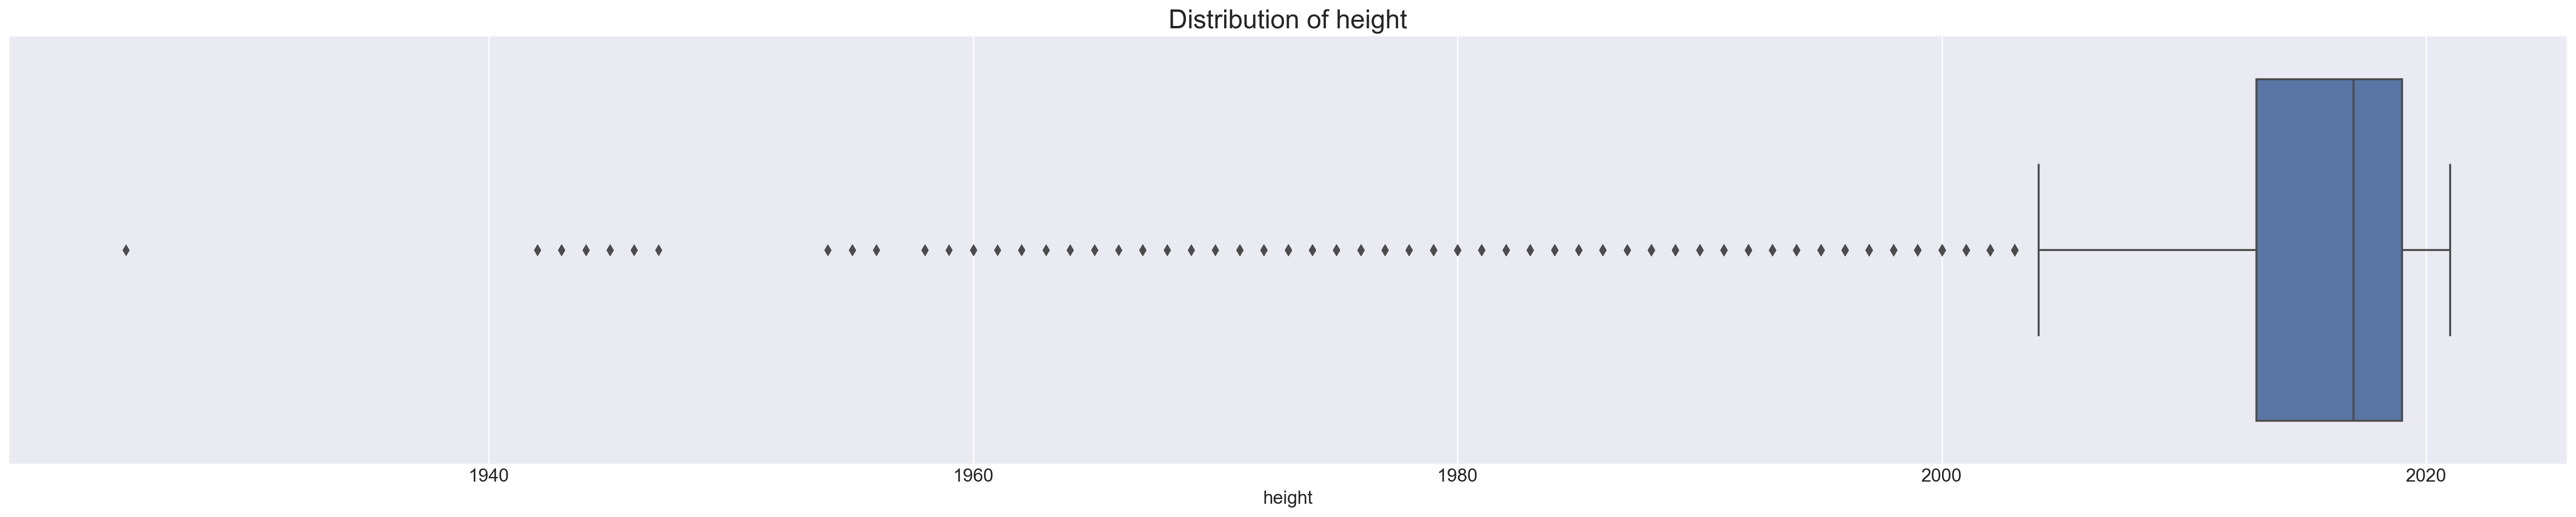

In [446]:
plt.figure(figsize = (35,6))
# box plot of the release year
ax = sns.boxplot(df['release_year'])

# notation indicating an outlier
ax.annotate('Outlier', xy=(190,0), xytext=(186,-0.05), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('height', fontsize=14)
plt.title('Distribution of height', fontsize=20)

In [ ]:
# there is a lot of historical content which is not prefered by modern audience

In [451]:
df['cast'].fillna(df['cast'].mode(), inplace = True)  # replacing null values



In [465]:
##############
############
#############

""" Business insights :

1 . The analsysis shows us that the there is high amt of movies produced per year than tv shows
2 . corona virus has the impacted the content quantity 
3 . the usa and india are the top 2 countries content wise
4 .the content targeted in india is teens while the content being targeted at usa is adult audience
5 lack of child content produced in india
6. india and south korean have similar taste and usa and uk audience have similar taste
7. lack of diverse conetent for indian audience 
"""

' Business insights :\n\n1 . The analsysis shows us that the there is high amt of movies produced per year than tv shows\n2 . corona virus has the impacted the content quantity \n3 . the usa and india are the top 2 countries content wise\n4 .the content targeted in india is teens while the content being targeted at usa is adult audience\n5 . ck of child content produced in india\n6. india and south korean have similar taste and usa and uk audience have similar taste\n7.\n'

In [ ]:
"""Recommendations:
1. produce more tv shows in high markets like india with diverse quantity
2. more movies targetting untapped young adult audience
3. more children quanity should be created """